In [3]:
#Proyek Bungaran Pakpahan


# Import library
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from prophet import Prophet

In [4]:
import requests

# URL file CSV global dari Google Mobility Reports (per Mei 2023 bisa berubah, cek di website resmi)
url = 'https://www.gstatic.com/covid19/mobility/Global_Mobility_Report.csv'

# Nama file output
filename = 'Global_Mobility_Report.csv'

# Download dan simpan file CSV
response = requests.get(url)

if response.status_code == 200:
    with open(filename, 'wb') as f:
        f.write(response.content)
    print(f'File berhasil diunduh dan disimpan sebagai {filename}')
else:
    print(f'Gagal mengunduh file, status code: {response.status_code}')

File berhasil diunduh dan disimpan sebagai Global_Mobility_Report.csv


In [7]:
df = pd.read_csv('Global_Mobility_Report.csv', parse_dates=['date'], low_memory=False)

In [8]:
# Contoh filter data Indonesia
df_id = df[df['country_region'] == 'Indonesia']

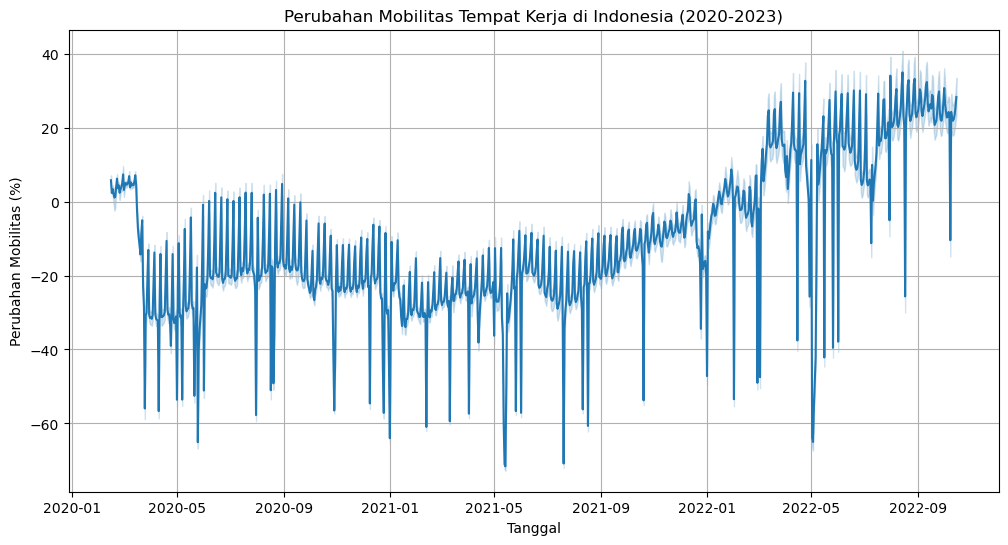

In [10]:
# Visualisasi tren mobilitas ke tempat kerja di Indonesia
plt.figure(figsize=(12,6))
sns.lineplot(
    x='date',
    y='workplaces_percent_change_from_baseline',
    data=df_id
)
plt.title('Perubahan Mobilitas Tempat Kerja di Indonesia (2020-2023)')
plt.xlabel('Tanggal')
plt.ylabel('Perubahan Mobilitas (%)')
plt.grid(True)
plt.show()


21:01:39 - cmdstanpy - INFO - Chain [1] start processing
21:01:46 - cmdstanpy - INFO - Chain [1] done processing


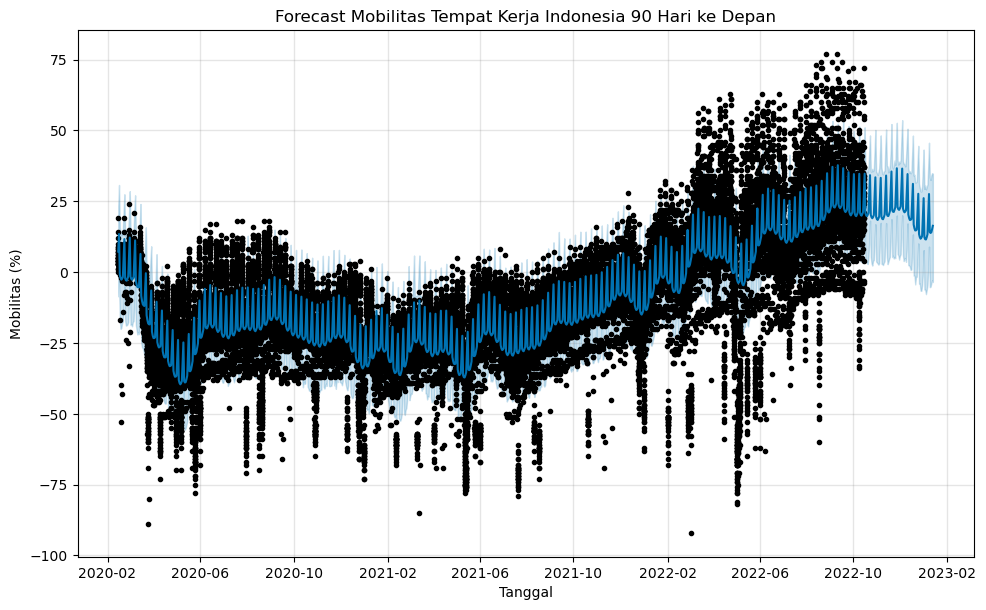

In [12]:
from prophet import Prophet
import matplotlib.pyplot as plt

# Siapkan data untuk Prophet
df_id_wp = df_id[['date', 'workplaces_percent_change_from_baseline']].rename(
    columns={'date': 'ds', 'workplaces_percent_change_from_baseline': 'y'}
)

# Buat model dan fit
model = Prophet()
model.fit(df_id_wp)

# Buat data prediksi 90 hari ke depan
future = model.make_future_dataframe(periods=90)
forecast = model.predict(future)

# Plot hasil forecasting
model.plot(forecast)
plt.title('Forecast Mobilitas Tempat Kerja Indonesia 90 Hari ke Depan')
plt.xlabel('Tanggal')
plt.ylabel('Mobilitas (%)')
plt.grid(True)
plt.show()


In [13]:
# Simulasi Insight Extraction (input ke IBM Granite AI bisa berupa summary berikut):
summary = """
Data menunjukkan tren penurunan mobilitas ke tempat kerja di Indonesia selama awal pandemi, 
diikuti pemulihan bertahap yang belum mencapai level sebelum pandemi hingga akhir 2023. 
Model forecasting menunjukkan tren pemulihan yang lambat, mengindikasikan perubahan pola kerja ke hybrid/remote.
"""

print(summary)


Data menunjukkan tren penurunan mobilitas ke tempat kerja di Indonesia selama awal pandemi, 
diikuti pemulihan bertahap yang belum mencapai level sebelum pandemi hingga akhir 2023. 
Model forecasting menunjukkan tren pemulihan yang lambat, mengindikasikan perubahan pola kerja ke hybrid/remote.

